<a href="https://colab.research.google.com/github/missattack/RedesComplexas/blob/main/ModeloSIR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# o que o programa faz?
# Agora o modelo SIS estocástico está implementado em uma rede,
# permitindo a simulação da propagação da infecção apenas pelos contatos
# definidos na estrutura da rede. Você pode escolher entre os três
# tipos de rede (Erdős-Rényi, Watts-Strogatz e Barabási-Albert)
# alterando o parâmetro tipo_rede. SEM DIAGRAMA DE FASE!

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Parâmetros do modelo
N = 1000  # População total
beta_values = np.linspace(0.1, 1.0, 20)  # Variação da taxa de transmissão
gamma = 0.1  # Taxa de recuperação
I0 = 1  # Número inicial de infectados
S0 = N - I0  # Número inicial de suscetíveis
t_max = 20  # Tempo máximo de simulação
simulations = 10  # Número de simulações
tipo_rede = "erdos_renyi"  # Escolha entre "erdos_renyi", "watts_strogatz", "barabasi_albert"
tipo_rede = "watts_strogatz"  # Escolha entre "erdos_renyi", "watts_strogatz", "barabasi_albert"
tipo_rede = "barabasi_albert"  # Escolha entre "erdos_renyi", "watts_strogatz", "barabasi_albert"



In [2]:
# Gerar rede conforme o tipo escolhido
if tipo_rede == "erdos_renyi":
    G = nx.erdos_renyi_graph(N, 0.01)  # Probabilidade de conexão 0.01
elif tipo_rede == "watts_strogatz":
    G = nx.watts_strogatz_graph(N, k=6, p=0.1)  # Cada nó conectado a 6 vizinhos com probabilidade de reconexão 0.1
elif tipo_rede == "barabasi_albert":
    G = nx.barabasi_albert_graph(N, m=3)  # Modelo de crescimento preferencial
else:
    raise ValueError("Tipo de rede inválido")

# Configuração das simulações
for beta in beta_values:
    S_results = np.zeros((simulations, t_max))
    I_results = np.zeros((simulations, t_max))

    for sim in range(simulations):
        states = {node: "S" for node in G.nodes()}
        infected_nodes = np.random.choice(list(G.nodes()), I0, replace=False)
        for node in infected_nodes:
            states[node] = "I"

        S = np.zeros(t_max)
        I = np.zeros(t_max)
        S[0] = S0
        I[0] = I0

        for t in range(1, t_max):
            new_states = states.copy()
            for node in G.nodes():
                if states[node] == "S":
                    infected_neighbors = sum(1 for neighbor in G.neighbors(node) if states[neighbor] == "I")
                    if np.random.rand() < 1 - (1 - beta)**infected_neighbors:
                        new_states[node] = "I"
                elif states[node] == "I":
                    if np.random.rand() < gamma:
                        new_states[node] = "S"

            states = new_states.copy()
            S[t] = sum(1 for state in states.values() if state == "S")
            I[t] = sum(1 for state in states.values() if state == "I")

        S_results[sim, :] = S
        I_results[sim, :] = I


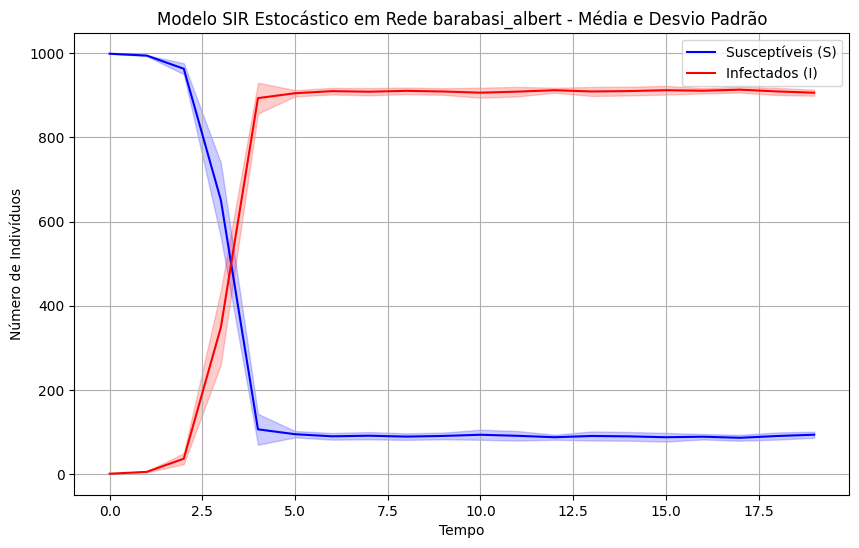

In [3]:
# Média e desvio padrão das simulações para um beta fixo
beta_fixed = 0.3  # Valor fixo de beta para análise temporal
S_mean = np.mean(S_results, axis=0)
I_mean = np.mean(I_results, axis=0)
S_std = np.std(S_results, axis=0)
I_std = np.std(I_results, axis=0)

# Gráfico da evolução de S e I com desvio padrão
plt.figure(figsize=(10, 6))
plt.plot(S_mean, label='Susceptíveis (S)', color='blue')
plt.fill_between(range(t_max), S_mean - S_std, S_mean + S_std, color='blue', alpha=0.2)
plt.plot(I_mean, label='Infectados (I)', color='red')
plt.fill_between(range(t_max), I_mean - I_std, I_mean + I_std, color='red', alpha=0.2)
plt.xlabel('Tempo')
plt.ylabel('Número de Indivíduos')
plt.title(f'Modelo SIR Estocástico em Rede {tipo_rede} - Média e Desvio Padrão')
plt.legend()
plt.grid()
plt.show()

In [4]:
# Agora o modelo SIR estocástico está implementado considerando interações
# em rede, permitindo simular a propagação da infecção dentro das
# estruturas de contato das redes de Erdős-Rényi, Watts-Strogatz e
# Barabási-Albert. Além disso, o gráfico inclui faixas de desvio
# padrão para melhor visualização da variabilidade das simulações.

# Parâmetros do modelo
N = 1000  # População total
beta = 0.3  # Taxa de transmissão
gamma = 0.1  # Taxa de recuperação
I0 = 1  # Número inicial de infectados
S0 = N - I0  # Número inicial de suscetíveis
R0 = 0  # Número inicial de recuperados
t_max = 50  # Tempo máximo de simulação
simulations = 10  # Número de simulações
tipo_rede = "erdos_renyi"  # Escolha entre "erdos_renyi", "watts_strogatz", "barabasi_albert"
tipo_rede = "watts_strogatz"  # Escolha entre "erdos_renyi", "watts_strogatz", "barabasi_albert"
tipo_rede = "barabasi_albert"  # Escolha entre "erdos_renyi", "watts_strogatz", "barabasi_albert"

# Gerar rede conforme o tipo escolhido
if tipo_rede == "erdos_renyi":
    G = nx.erdos_renyi_graph(N, 0.01)
elif tipo_rede == "watts_strogatz":
    G = nx.watts_strogatz_graph(N, k=6, p=0.1)
elif tipo_rede == "barabasi_albert":
    G = nx.barabasi_albert_graph(N, m=3)
else:
    raise ValueError("Tipo de rede inválido")

# Configuração das simulações
S_results = np.zeros((simulations, t_max))
I_results = np.zeros((simulations, t_max))
R_results = np.zeros((simulations, t_max))



In [5]:
for sim in range(simulations):
    states = {node: "S" for node in G.nodes()}
    infected_nodes = np.random.choice(list(G.nodes()), I0, replace=False)
    for node in infected_nodes:
        states[node] = "I"

    S = np.zeros(t_max)
    I = np.zeros(t_max)
    R = np.zeros(t_max)
    S[0] = S0
    I[0] = I0
    R[0] = R0

    for t in range(1, t_max):
        new_states = states.copy()
        for node in G.nodes():
            if states[node] == "S":
                infected_neighbors = sum(1 for neighbor in G.neighbors(node) if states[neighbor] == "I")
                if np.random.rand() < 1 - (1 - beta) ** infected_neighbors:
                    new_states[node] = "I"
            elif states[node] == "I":
                if np.random.rand() < gamma:
                    new_states[node] = "R"

        states = new_states.copy()
        S[t] = sum(1 for state in states.values() if state == "S")
        I[t] = sum(1 for state in states.values() if state == "I")
        R[t] = sum(1 for state in states.values() if state == "R")

    S_results[sim, :] = S
    I_results[sim, :] = I
    R_results[sim, :] = R



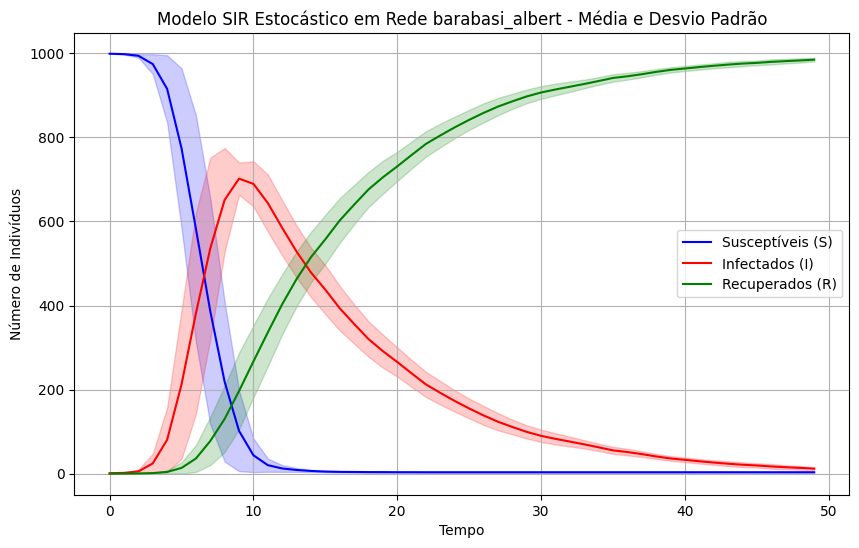

In [6]:
# Média e desvio padrão das simulações
S_mean = np.mean(S_results, axis=0)
I_mean = np.mean(I_results, axis=0)
R_mean = np.mean(R_results, axis=0)
S_std = np.std(S_results, axis=0)
I_std = np.std(I_results, axis=0)
R_std = np.std(R_results, axis=0)

# Gráfico da evolução de S, I e R com desvio padrão
plt.figure(figsize=(10, 6))
plt.plot(S_mean, label='Susceptíveis (S)', color='blue')
plt.fill_between(range(t_max), S_mean - S_std, S_mean + S_std, color='blue', alpha=0.2)
plt.plot(I_mean, label='Infectados (I)', color='red')
plt.fill_between(range(t_max), I_mean - I_std, I_mean + I_std, color='red', alpha=0.2)
plt.plot(R_mean, label='Recuperados (R)', color='green')
plt.fill_between(range(t_max), R_mean - R_std, R_mean + R_std, color='green', alpha=0.2)
plt.xlabel('Tempo')
plt.ylabel('Número de Indivíduos')
plt.title(f'Modelo SIR Estocástico em Rede {tipo_rede} - Média e Desvio Padrão')
plt.legend()
plt.grid()
plt.show()